# Computer Vision with PyTorch :
https://www.learnpytorch.io/03_pytorch_computer_vision/

Different problems :
* 1 - Classification
* 2 - Object detection
* 3 - Segmentation of an image

Inputs : 224x224x3 (H x W x RGB) // (Nb_batch x H x W x RGB)


Outputs : Depends on the problem

Type of algo : CNN or Transformers

## CNN Architecture :

* Input layer
* Convolution layer
* Hidden activation (non-linear activation)
* Pooling layer
* Output layer (linear layer)

## Librairies for CV :

* torchvision : base domain for CV with PyTorch
* torchvision.datasets : datasets and data loading function for CV
* torchvision.models : pretrained CV models
* torchvision.transforms : functions for manipulation images to be suitable for use with an ML pb
* torch.utils.data.Dataset : base dataset class for PyTorch
* torch.utils.data.DataLoader : create a python iterable over a dataset

In [ ]:
#PyTorch
import torch
from torch import nn

#Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

#Check version
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1 - Getting a dataset :

FashionMNIST from torchvision.datasets

In [ ]:
# Setup training data
from torchvision import datasets
train_data=datasets.FashionMNIST(root="data", #Where to download data to ?
                                 train=True, #Training set or testing set ?
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(), #How do we want to transform the data ?
                                 target_transform=None) #Same but with the labels

test_data=datasets.FashionMNIST(root="data", #Where to download data to ?
                                 train=False, #Training set or testing set ?
                                 download=True,
                                 transform=torchvision.transforms.ToTensor(), #How do we want to transform the data ?
                                 target_transform=None) #Same but with the labels


100%|██████████| 26421880/26421880 [00:02<00:00, 12486637.99it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 218883.62it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3706125.06it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1246019.79it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the training example :
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Shape : color_channels, height, width
image.shape, label

(torch.Size([1, 28, 28]), 9)

### Visualizing data :

Image shape : torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

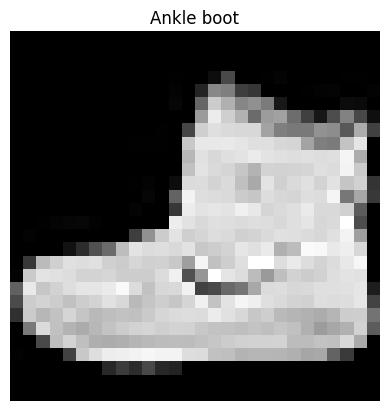

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

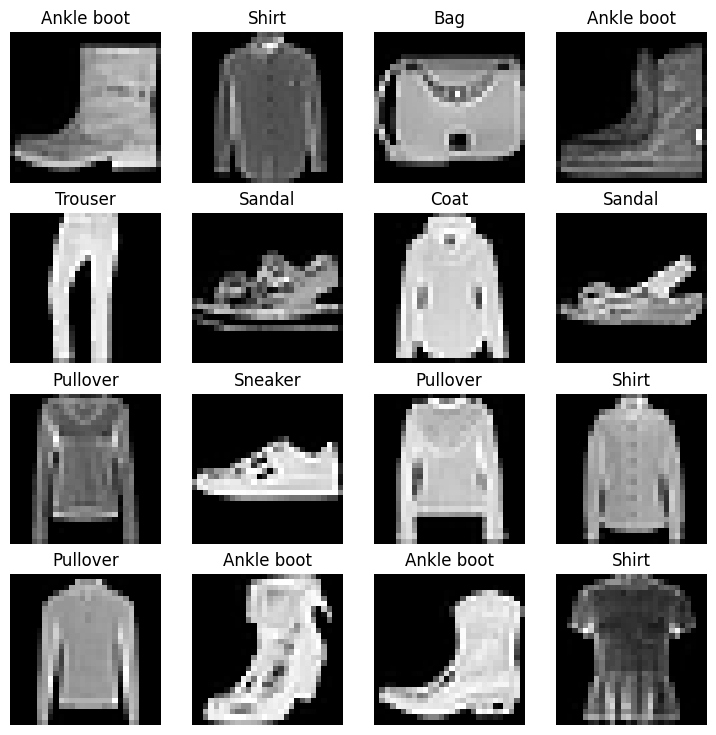

In [ ]:
# Plot more images :
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols=4, 4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2 - Prepare DataLoader :

Right now our data is in the form of PyTorch Datasets

DataLoader turns our datasets into a Python iterable

Specifically we want to turn our data into batches (or mini_batches)

Why ?

1. More computationally efficient.
2. Give our neural network ore chances to update its gradients per epoch

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size Hyperparameter :
BATCH_SIZE=32

# Turn datasets into iterable :
train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d790bab6590>,
 <torch.utils.data.dataloader.DataLoader at 0x7d790bab62c0>)

In [ ]:
print(f"Data Loaders : {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

Data Loaders : (<torch.utils.data.dataloader.DataLoader object at 0x7d790bab6590>, <torch.utils.data.dataloader.DataLoader object at 0x7d790bab62c0>)
Length of train_dataloader : 1875 batches of 32
Length of test_dataloader : 313 batches of 32


In [ ]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Img size : torch.Size([1, 28, 28])
Label :6; label size : torch.Size([])


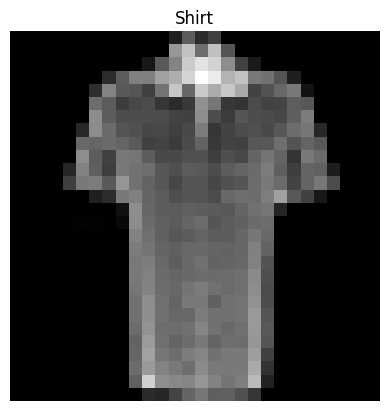

In [ ]:
# Show a sample :
torch.manual_seed(42)

random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Img size : {img.shape}')
print(f'Label :{label}; label size : {label.shape}')

## 3 - Model_0

Baseline model : simple model you will try and improve upon with subsequent models and experiments.

Start simply and add complexity later.

In [ ]:
# Create a flatten layer :
flatten_model = nn.Flatten()

# Get a single sample :
x= train_features_batch[0]

# Flatten the sample:
output=flatten_model(x)

# Print :
print(f"Shape Before flattening :{x.shape}")
print(f"Shape after flattening :{output.shape}")

Shape Before flattening :torch.Size([1, 28, 28])
Shape after flattening :torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module) :
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int) :
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )
  def forward(self,x) :
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#Setup model with input param :
model_0=FashionMNISTModelV0(input_shape=28*28,
                            hidden_units=10,
                            output_shape=len(class_names)).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss & Optimizer & Evaluation metrics :

In [ ]:
import requests
from pathlib import Path

# Download helper func from Learn PyTorch repo :

if Path("helper_function.py").is_file() :
  print("already exist")
else :
  print("ok")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_function.py',"wb") as f :
    f.write(request.content)

ok


In [ ]:
#Import accuracy metric :
from helper_function import accuracy_fn

# Loss
loss_fn=nn.CrossEntropyLoss()

# Optim
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### Time experiments :

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float,device:torch.device=None):
  """ Print diff btw start and end time """
  total_time=end-start
  print(f"Train time on : {device} : {total_time:.3f} seconds")
  return total_time


In [ ]:
start_time=timer()
## Code

end_time=timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on : cpu : 0.000 seconds


4.080600001543644e-05

### Training & testing loop :

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate train loss per batch
3. Same with testing batches
4. Print out
5. Time it all (for fun)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

#Set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()

#Set the number of epoch (keep this small for faster training)
epochs=3

# Training & testing loop
for epoch in tqdm(range(epochs)) :
  print(f"Epoch : {epoch}\n-------")
  ### Training :
  train_loss=0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader) :
    model_0.train()
    # Forward pass :
    y_pred=model_0(X)
    # Loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss #Accumulate training loss
    #Zero grad
    optimizer.zero_grad()
    #Backward
    loss.backward()
    # Grad desc
    optimizer.step()
    # Print
    if batch%400==0 :
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  #Average per batch
  train_loss/=len(train_dataloader)

  ### Testing :
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader :
      test_pred=model_0(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    # Calculate test loss (& acc) avg per batches
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.4f} | Test lsos: {test_loss:.4f} | test_acc : {test_acc:.2f}")
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5904 | Test lsos: 0.5095 | test_acc : 82.04
Epoch : 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4763 | Test lsos: 0.4799 | test_acc : 83.20
Epoch : 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4550 | Test lsos: 0.4766 | test_acc : 83.43
Train time on : cpu : 29.953 seconds


## 4. Make preds and get model_0 results :

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device) :
  """ Return a dictionary containing the reusltts of model predicting on dat_alaoder """
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader :
      #Make our data device agnostic :
      X,y=X.to(device),y.to(device)
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    # Scale the loss and acc to fin avg per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with class
         "model_loss" : loss.item(),
         "model_acc" : acc}

In [ ]:
# Calculate model_0 results on test dataset
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device="cpu")
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Device agnostic-code :

In [ ]:
import torch
# device="cuda" if torch.cuda.is_available() else "cpu"
if torch.cuda.is_available() : device="cuda"
else : device='cpu'
device

'cuda'

## 6. Model_1 : Build a better model with non-linearity :

https://horace.io/brrr_intro.html

In [ ]:
# Create a model with linear and non-linear data :
class FashionMNISTModelV1(nn.Module) :
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int) :
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=28*28,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Loss & Optimiez & eval metrics :


In [ ]:
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_1.parameters(),lr=0.1)

### 6.2 Functionizing training and testing loops :

Create a function for :
* Training loop : train_step()
* Testing loop : test_step()

In [ ]:
def train_step(model:  torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device) :
  """Performs training with model trying to learn on data_loader"""
  train_loss, train_acc=0,0
  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader) :
    # Put data to device :
    X,y=X.to(device),y.to(device)
    # Forward pass :
    y_pred=model(X)
    # Loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss #Accumulate training loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #Zero grad
    optimizer.zero_grad()
    #Backward
    loss.backward()
    # Grad desc
    optimizer.step()

  #Average per batch
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss : {train_loss:.5f} | Train acc : {train_acc:.2f}%")

In [ ]:
def test_step(model:  torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device) :
  """Performs testing loop step on model going over data_loader"""
  test_loss,test_acc=0,0
  # Put model in eval mode
  model.eval()
  # Turn on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader :
      # Send data to target device
      X,y=X.to(device),y.to(device)
      # Forward prop
      test_pred=model(X)
      # Calculate loss / acc
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    # Calculate test loss (& acc) avg per batches
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | test_acc : {test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)

# Measure time :
from timeit import default_timer as timer
train_time_start_on_gpu=timer()

# Set epochs :
epochs=3

# Training / testing loop :

for epoch in tqdm(range(epochs)) :
  print(f"Epochs :{epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()
total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs :0
------
Train loss : 1.09199 | Train acc : 61.34%

Train loss: 0.4550 | Test loss: 0.9564 | test_acc : 65.00%
Epochs :1
------
Train loss : 0.78101 | Train acc : 71.93%

Train loss: 0.4550 | Test loss: 0.7223 | test_acc : 73.91%
Epochs :2
------
Train loss : 0.67027 | Train acc : 75.94%

Train loss: 0.4550 | Test loss: 0.6850 | test_acc : 75.02%
Train time on : cuda : 53.774 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model train s faster on CPU than GPU.

> Why ?

> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU

> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU (rare)

In [ ]:
model_0_results, total_train_time_model_0
# Faster model on GPU, better model on CPU (Attention c'est deux model diff)

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663888335227966,
  'model_acc': 83.42651757188499},
 29.952924445999997)

In [ ]:
# Get model_1 results dictionnary :
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_1_results,total_train_time_model_1

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821},
 53.77405819299997)

## 7. Model_2 : Building a CNN (ConvNets or Convolutionnal Neural Network)

https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a CNN :
class FashionMNISTModelV2(nn.Module):
  """Model architecture the TinyVGG model from CNN explainer website"""
  def __init__(self, input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Hyperparameters of Conv2d
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  padding=1,
                  kernel_size=3,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(nn.Flatten(),
                                  nn.Linear(in_features=hidden_units*7*7,out_features=output_shape))
  def forward(self, x:torch.Tensor) :
    x= self.conv_block_1(x)
    x=self.conv_block_2(x)
    return self.classifier(x)

In [ ]:
torch.manual_seed(42)

model_2=FashionMNISTModelV2(input_shape=1, #Number of color channels
                            output_shape=len(class_names), #Number of class
                            hidden_units=10).to(device)

In [ ]:
rand_image_tensor=torch.randn(size=(1,28,28)).to(device)
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d()

In [ ]:
torch.manual_seed(42)

# Create a batch of images :
images=torch.randn(size=(32,3,64,64))
test_image=images[0]

print(f"Image batch shape :{image.shape}")
print(f"Single image shape :{test_image.shape}")
print(f"Test image :{test_image}")

Image batch shape :torch.Size([1, 28, 28])
Single image shape :torch.Size([3, 64, 64])
Test image :tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,
                     stride=1, # Deplacement de pixel
                     kernel_size=3, # Taille du noyau de convolution
                     padding=1) # Extra pixel sur l'ext pour gérer les infos sur les bords de l'img

# Pass the data through the convolutional layer
conv_output=conv_layer(test_image)
conv_output

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [ ]:
test_image.shape, conv_output.shape

(torch.Size([3, 64, 64]), torch.Size([10, 64, 64]))

### 7.2 Stepping through MaxPool2d()

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueezed dim
print(f"Test img original shape :{test_image.shape}")
print(f'Test image with unsqueeze dim : {test_image.unsqueeze(0).shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer=nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_conv = conv_layer(test_image.unsqueeze(0))
print(f'Shape after conv : {test_image_conv.shape}')

# Pass through max pool :
test_image_max_pool=max_pool_layer(test_image_conv)
print(f'Shape after conv & max pool : {test_image_max_pool.shape}')

Test img original shape :torch.Size([3, 64, 64])
Test image with unsqueeze dim : torch.Size([1, 3, 64, 64])
Shape after conv : torch.Size([1, 10, 64, 64])
Shape after conv & max pool : torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create random tensor with a similar number of dim to our images :
random_tensor=torch.randn(size=(1,1,2,2))
print(random_tensor, random_tensor.shape)

# Create max pool layer :
max_pool_layer=nn.MaxPool2d(kernel_size=2)

# Pass data through maxpoollayer
max_pool_tensor=max_pool_layer(random_tensor)
max_pool_tensor, max_pool_tensor.shape

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) torch.Size([1, 1, 2, 2])


(tensor([[[[0.3367]]]]), torch.Size([1, 1, 1, 1]))

### 7.3 Setup a loss & optimizer for model_2 :

In [ ]:
# Steup loss & optimizer & eval func
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

### 7.4 Training & Testing :  

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Time :
from timeit import default_timer as timer
train_time_start_model2=timer()

# Train & test :
epochs=3
for epoch in tqdm(range(epochs)) :
  print(f'Epoch : {epoch}-----------')
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model2,end=train_time_end_model2,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0-----------
Train loss : 0.59158 | Train acc : 78.58%

Train loss: 0.4550 | Test loss: 0.3925 | test_acc : 85.91%
Epoch : 1-----------
Train loss : 0.36524 | Train acc : 86.80%

Train loss: 0.4550 | Test loss: 0.3539 | test_acc : 86.91%
Epoch : 2-----------
Train loss : 0.32832 | Train acc : 88.03%

Train loss: 0.4550 | Test loss: 0.3189 | test_acc : 88.45%
Train time on : cuda : 53.132 seconds


In [ ]:
# Get model_2 results :
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31890401244163513,
 'model_acc': 88.44848242811501}

In [ ]:
model_0_results, model_1_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663888335227966,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821})

## 8. Compare model results and training time

In [ ]:
import pandas as pd

compare_results=pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.318904,88.448482


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,29.952924
1,FashionMNISTModelV1,0.685001,75.019968,53.774058
2,FashionMNISTModelV2,0.318904,88.448482,53.132286


Text(0, 0.5, 'model')

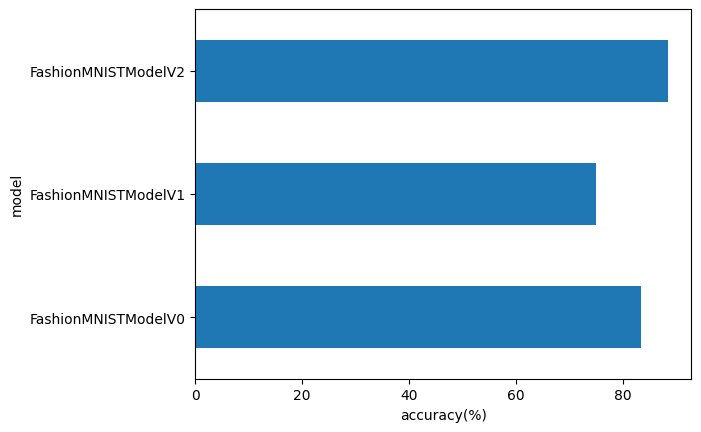

In [ ]:
# Visualize results :
compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel('accuracy(%)')
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model :

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data :
      # prepare the sample (add a batch dim and pass to target device)
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward
      pred_logit=model(sample)

      # Get pred probs :
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations :
      pred_probs.append(pred_prob.cpu())

  # Stack the probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9) :
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

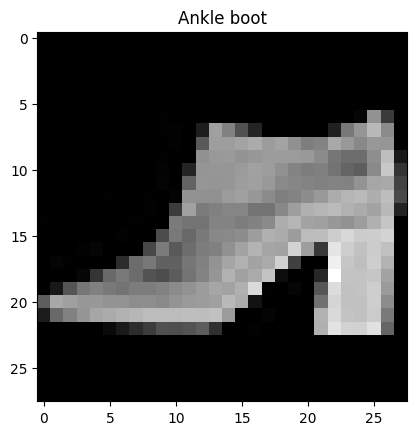

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make preds :
pred_probs=make_predictions(model=model_2,
                            data=test_samples)

# View first two pred probs :
pred_probs[:2]

tensor([[2.2325e-06, 9.3164e-07, 5.1779e-07, 2.9326e-06, 2.8351e-07, 2.6826e-02,
         1.5306e-06, 1.3664e-04, 1.7581e-04, 9.7285e-01],
        [1.1334e-05, 5.7142e-06, 1.6233e-03, 3.0708e-07, 9.9138e-01, 6.1437e-08,
         6.9430e-03, 2.4442e-07, 4.0231e-05, 8.2854e-07]])

In [ ]:
# Convert pred probs to labels
pred_class=pred_probs.argmax(dim=1)
pred_class, test_labels

(tensor([9, 4, 6, 9, 7, 0, 4, 0, 5]), [9, 4, 2, 9, 7, 6, 4, 0, 5])

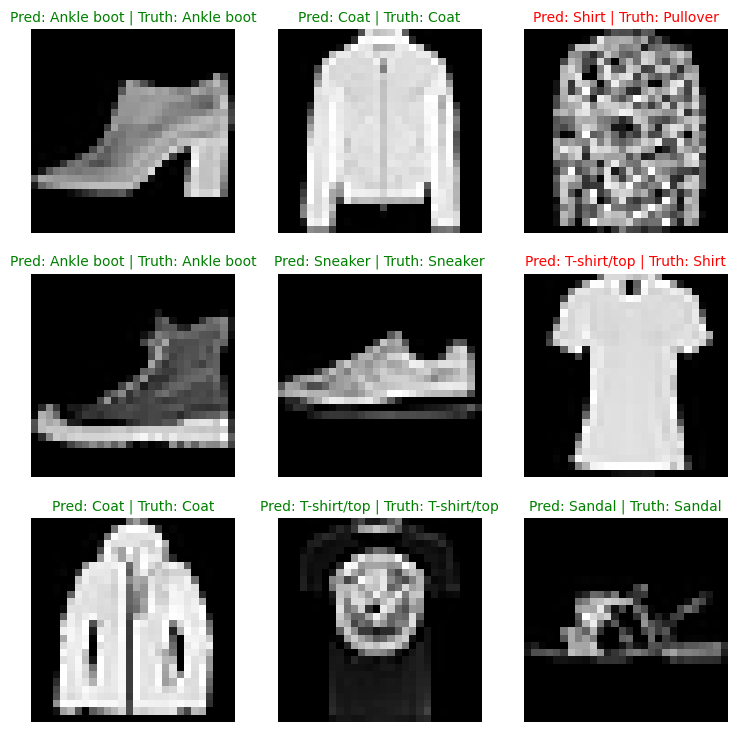

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')
  pred_label=class_names[pred_class[i]]
  truth_label=class_names[test_labels[i]]
  title_text=f'Pred: {pred_label} | Truth: {truth_label}'
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else :
    plt.title(title_text,fontsize=10,c='r')
  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation :

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make pred with trained models:
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc='Making preds.....'):
    X,y=X.to(device),y.to(device)
    y_logit=model_2(X)
    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making preds.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
# See if required packages are installed and if not, install them
try:
  import torchmetrics, mlxtend
  print(f'mlxtend version :{mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1]>=19,"mlxtend version should be 0.19.0 or higher")
except :
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics,mlxtend
  print(f'mlxtend version : {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.6 MB/s eta 0:00:00
mlxtend version : 0.23.1


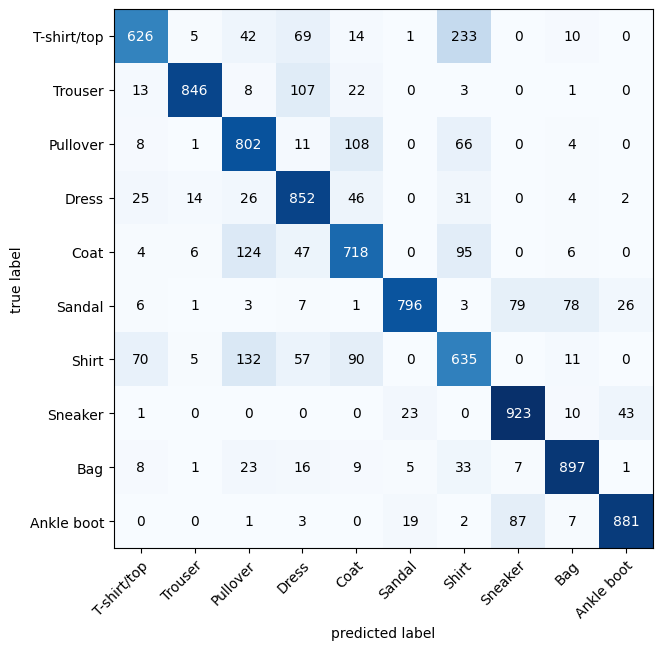

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Steup confusion isntance and compare pred to target
confmat=ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)

# 3. plot confmat :
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # Matplotlib likes numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model :

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# Save model state_dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance :
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model : (should be close to model_2)
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31890401244163513,
 'model_acc': 88.44848242811501}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31890401244163513,
 'model_acc': 88.44848242811501}

# Exercices :
https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises

Solution : https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb